# <center>**Melanoma Detection Assignment**


# **Content** :

1. Introduction
    - Problem Statement
    - Objective of the Project
2. Importing all the Required Libraries
3. Data Reading/Data Understanding
  - Defining the path for train and test images
4. Dataset Creation
  - Creating Batch Size
  - Resizing Images
  - Create, train & validation dataset from the train directory
5. Dataset Visualisation
  - Visualize all the Classes Present in the Dataset
6. Model Building & training
  - Create the Model
  - Compile the Model
  - Train the Model
  - Visualizing the Model
  - Findings of the Model
7. Model Building & training on the augmented data
  - Create the Model
  - Compiling the Model
  - Training the Model
  - Visualizing the Results
8. Class distribution
9. Handling class imbalances
  - Train the model on the data createdusing Augmentor
  - Create a training dataset
  - Create a validation dataset
  - Create your model(make sure to include normalization)
  - Compile your Model(Choose Optimizer and Loss Function)
10. Model Building & training on the rectified class imbalance data
  - Train your Model
  - Visualize the Model Results

# **1. Introduction**

## **1.1 Problem Statement** :

 Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths.

## **1.2 Objective of the Project** :

- To build a CNN based model which can accurately detect melanoma.
- To build a multiclass classification model using a custom convolutional neural network in TensorFlow.
- A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# **2. Importing all the Required Libraries** :

In [44]:
import numpy as np
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# **3. Data Reading/Data Understanding** :

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## **3.1 Defining the path for train and test images** :

In [42]:
# Defining the path for train and test images
## Updating the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Test')

In [ ]:
## Looking at the the list of files in the directory
!ls

gdrive	sample_data


In [ ]:
## Checking the image count in train and test data sets
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2248
118


Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

# **4. Dataset Creation** :

Define some parameters for the loader:

 ## **4.1 Creating Batch Size**

In [ ]:
batch_size = 32

 ## **4.2 Resizing Images**

In [ ]:
img_height = 180
img_width = 180

**Using 80% of the images for training, and 20% for validation.**

 ## **4.3  Create train & validation dataset from the train directory**

In [ ]:
## Writing the train dataset
##  used seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
##  resizing images to the size img_height*img_width
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2248 files belonging to 9 classes.
Using 1799 files for training.


In [ ]:
## checking the validation dataset
## used seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory
## Resized images to the size img_height*img_width
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2248 files belonging to 9 classes.
Using 449 files for validation.


In [ ]:
# Listing out all the classes of skin cancer and storing them in a list.
# Checking the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# **5. Dataset Visualisation** :

 ## **5.1  Visualize all the Classes Present in the Dataset**

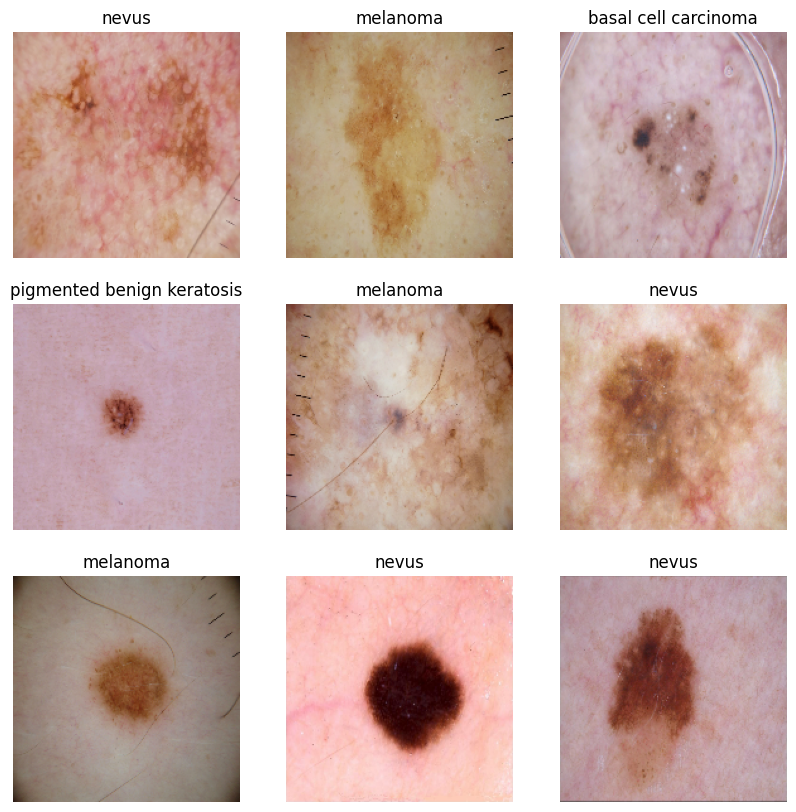

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **6. Model Building & Training** :

## **6.1 Create the Model** :

Creating a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



## **6.2 Compile the model** :
Choose an appropirate optimiser and loss function for model training

In [ ]:
### choose Sparse Categorical Crossentropy optimiser and relu loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## **6.3 Train the model** :

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 281s 1s/step - loss: 2.2009 - accuracy: 0.2251 - val_loss: 1.9793 - val_accuracy: 0.2851
Epoch 2/20
57/57 [==============================] - 1s 20ms/step - loss: 1.8889 - accuracy: 0.3068 - val_loss: 1.9469 - val_accuracy: 0.2539
Epoch 3/20
57/57 [==============================] - 1s 21ms/step - loss: 1.7144 - accuracy: 0.3952 - val_loss: 1.5476 - val_accuracy: 0.4833
Epoch 4/20
57/57 [==============================] - 1s 20ms/step - loss: 1.4690 - accuracy: 0.4925 - val_loss: 1.4633 - val_accuracy: 0.5056
Epoch 5/20
57/57 [==============================] - 1s 20ms/step - loss: 1.3650 - accuracy: 0.5125 - val_loss: 1.4610 - val_accuracy: 0.4788
Epoch 6/20
57/57 [==============================] - 1s 20ms/step - loss: 1.2404 - accuracy: 0.5575 - val_loss: 1.3749 - val_accuracy: 0.4922
Epoch 7/20
57/57 [==============================] - 1s 20ms/step - loss: 1.2064 - accuracy: 0.5770 - val_loss: 1.3878 - val_accuracy: 0.5234
Epoch 8/20
57

## **6.4 Visualizing Training Results** :

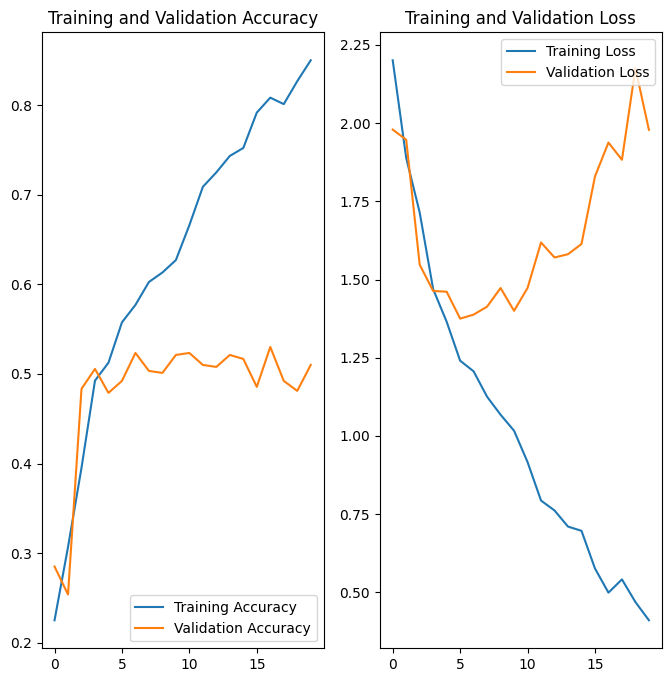

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **6.5 Findings after the model fit** :

Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Clearly the modelis **underfitting** as validation loss is too high when compared with training loss resulting in poor validation accuracy

In [43]:
# data augumentation by flipping the images horizontally.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

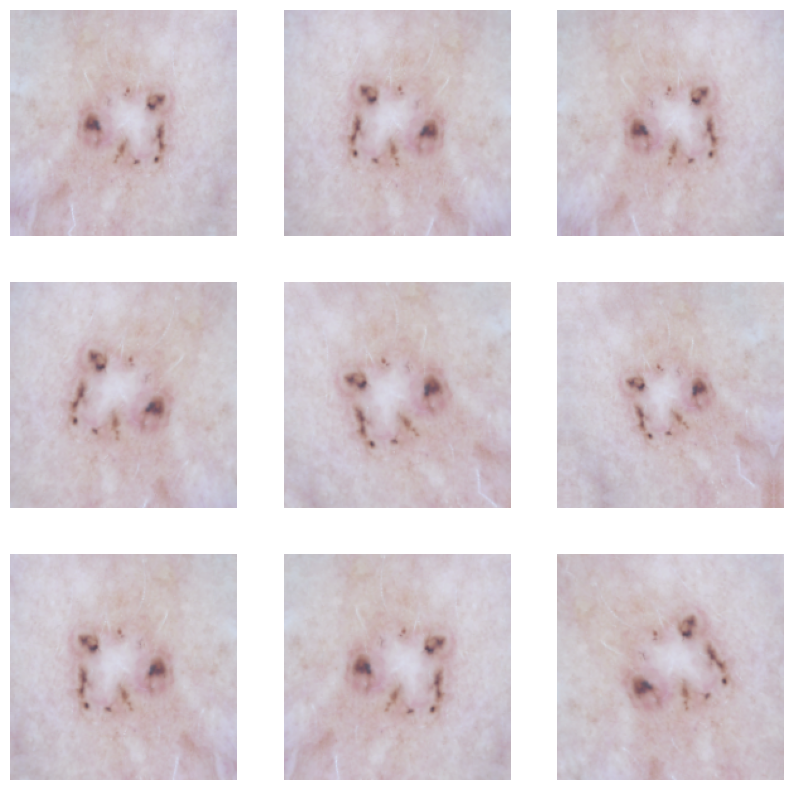

In [ ]:
# Visualize augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# **7. Model Building & Training on the augmented data**

## **7.1 Create the Model**

In [ ]:
## Dropout layer introduced to tackle overfitting

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




## **7.2 Compiling the model**

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **7.3 Training the model**

In [ ]:
## Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 6s 32ms/step - loss: 1.9088 - accuracy: 0.2902 - val_loss: 1.7249 - val_accuracy: 0.3786
Epoch 2/20
57/57 [==============================] - 2s 30ms/step - loss: 1.6374 - accuracy: 0.4230 - val_loss: 1.7598 - val_accuracy: 0.3541
Epoch 3/20
57/57 [==============================] - 2s 33ms/step - loss: 1.4953 - accuracy: 0.4764 - val_loss: 1.4455 - val_accuracy: 0.4922
Epoch 4/20
57/57 [==============================] - 2s 30ms/step - loss: 1.3882 - accuracy: 0.5197 - val_loss: 1.4948 - val_accuracy: 0.4722
Epoch 5/20
57/57 [==============================] - 2s 31ms/step - loss: 1.4333 - accuracy: 0.5019 - val_loss: 1.3924 - val_accuracy: 0.5011
Epoch 6/20
57/57 [==============================] - 2s 28ms/step - loss: 1.3887 - accuracy: 0.5158 - val_loss: 1.4568 - val_accuracy: 0.4588
Epoch 7/20
57/57 [==============================] - 2s 28ms/step - loss: 1.3169 - accuracy: 0.5297 - val_loss: 1.3484 - val_accuracy: 0.5145
Epoch 8/20
57

## **7.4 Visualizing the results**

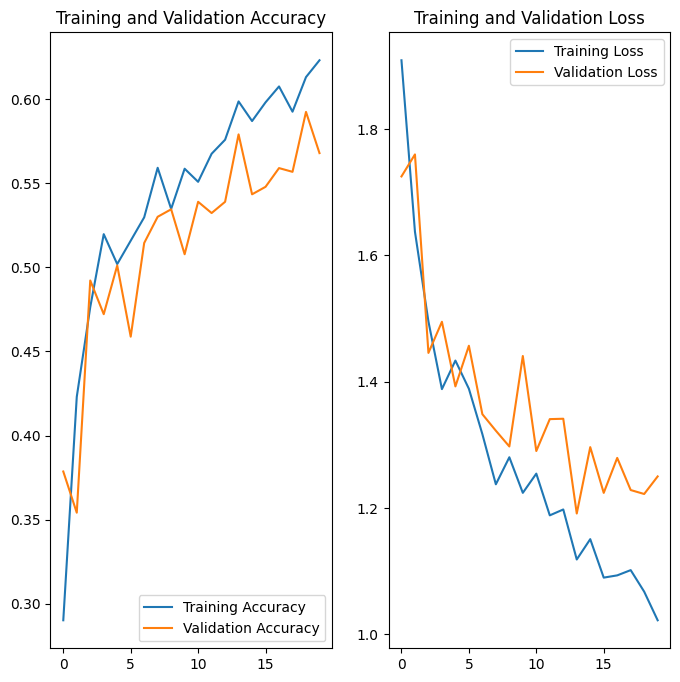

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is an very good improvement from the previous model but still the model can be improved as there is substantial difference in training and validation loss and accuracy.

Find the distribution of classes in the training dataset.

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2248

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,pigmented benign keratosis
1,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,pigmented benign keratosis
2,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,pigmented benign keratosis
3,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,pigmented benign keratosis
4,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,pigmented benign keratosis
...,...,...
2243,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,squamous cell carcinoma
2244,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,squamous cell carcinoma
2245,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,squamous cell carcinoma
2246,/content/gdrive/MyDrive/CNN_SkinCancerData/CNN...,squamous cell carcinoma


Class=5, n=462 (20.552%)
Class=3, n=447 (19.884%)
Class=1, n=376 (16.726%)
Class=6, n=77 (3.425%)
Class=2, n=95 (4.226%)
Class=4, n=357 (15.881%)
Class=8, n=139 (6.183%)
Class=0, n=114 (5.071%)
Class=7, n=181 (8.052%)


<BarContainer object of 9 artists>

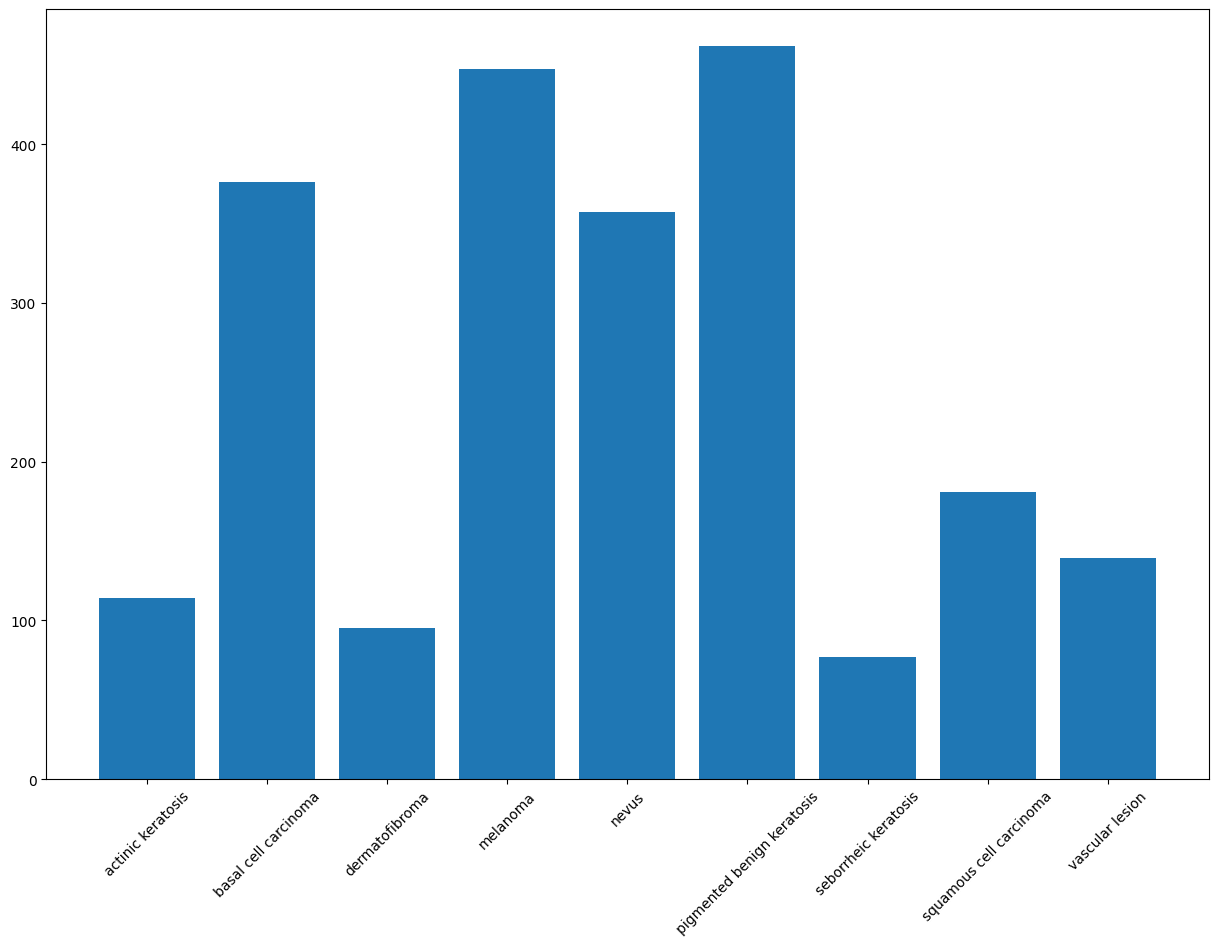

In [ ]:
### Checking the distribution of all the images category wise

from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.bar(class_names,count)

# **8. Class Distribution**

- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?

- **Seborrheic keratosis** is having the lowest distribution
- **Pigmented Benign keratosis** is having the highest distribution of data

# **9. Handling Class Imbalance**

Rectify the class imbalance

You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

In [45]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD26DA37280>: 100%|██████████| 500/500 [00:19<00:00, 25.09 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD1B5F13B80>: 100%|██████████| 500/500 [00:18<00:00, 26.76 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD1B46AFEB0>: 100%|██████████| 500/500 [00:20<00:00, 23.87 Samples/s]


Initialised with 447 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x7DD2E9087D90>: 100%|██████████| 500/500 [01:30<00:00,  5.53 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7DD22066ADD0>: 100%|██████████| 500/500 [01:19<00:00,  6.28 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DD1B46C1F00>: 100%|██████████| 500/500 [00:21<00:00, 23.80 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DD1B46882E0>: 100%|██████████| 500/500 [00:39<00:00, 12.61 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DD1BE938670>: 100%|██████████| 500/500 [00:18<00:00, 26.85 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_SkinCancerDetection/CNN_SkinCancerData/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD1BE93A7D0>: 100%|██████████| 500/500 [00:21<00:00, 23.36 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN_SkinCancerData/CNN_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026219.jpg_3d3e6c5e-002f-467b-b219-eddaea6921ad.jpg',
 '/content/gdrive/MyDrive/CNN_SkinCancerData/CNN_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027831.jpg_578d3d53-6ed3-423d-a600-aa0f570111c5.jpg',
 '/content/gdrive/MyDrive/CNN_SkinCancerData/CNN_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026614.jpg_e11749a7-9f7f-4478-81df-e8ea269c39d9.jpg',
 '/content/gdrive/MyDrive/CNN_SkinCancerData/CNN_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027771.jpg_239bbb20-2afe-4806-8cd5-8ac93a21207b.jpg',
 '/content/gdrive/MyDrive/CNN_SkinCancerData/CNN_Assignment/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026443.jpg_d8580167-64c8-4953-ac6f-c725447f97da.jpg',
 '/content/gdrive/My

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [ ]:
### Creating the new dataframe with path list and lesion list
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
### Concatenating the new dataframe with columns Path and label
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df._append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## **9.1 Train the model on the data created using Augmentor**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

## **9.2 Create a training dataset**

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6748 files belonging to 9 classes.
Using 5399 files for training.


## **9.3 Create a validation dataset**

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6748 files belonging to 9 classes.
Using 1349 files for validation.


## **9.4 Create your model (make sure to include normalization)**

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

## **9.5 Compile your model (Choose optimizer and loss function appropriately)**

In [ ]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **10. Model Building and Training on the rectified class imbalance data**

## **10.1 Train your model**

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 52s 88ms/step - loss: 1.9084 - accuracy: 0.2671 - val_loss: 1.9493 - val_accuracy: 0.2061
Epoch 2/30
169/169 [==============================] - 4s 24ms/step - loss: 1.6219 - accuracy: 0.3891 - val_loss: 1.4401 - val_accuracy: 0.4596
Epoch 3/30
169/169 [==============================] - 4s 25ms/step - loss: 1.4377 - accuracy: 0.4551 - val_loss: 1.3898 - val_accuracy: 0.4566
Epoch 4/30
169/169 [==============================] - 4s 24ms/step - loss: 1.3326 - accuracy: 0.4936 - val_loss: 1.2379 - val_accuracy: 0.5219
Epoch 5/30
169/169 [==============================] - 4s 24ms/step - loss: 1.2265 - accuracy: 0.5371 - val_loss: 1.1892 - val_accuracy: 0.5367
Epoch 6/30
169/169 [==============================] - 5s 29ms/step - loss: 1.1520 - accuracy: 0.5668 - val_loss: 1.1405 - val_accuracy: 0.5582
Epoch 7/30
169/169 [==============================] - 4s 24ms/step - loss: 1.0334 - accuracy: 0.6094 - val_loss: 1.0156 - val_accuracy: 0.618

## **10.2 Visualize the model results**

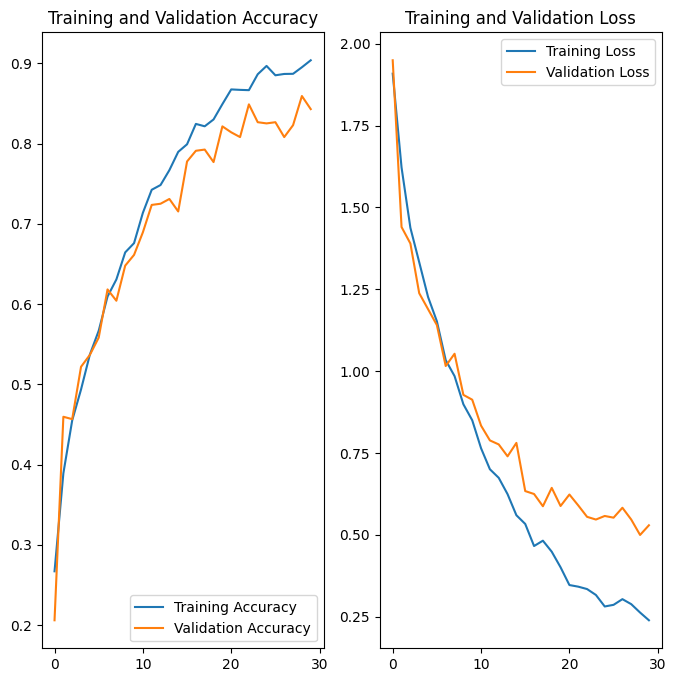

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **10.3 Findings**

Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- The class rebalance helped in reducing overfititng of the data and thus the loss is beng reduced but it reduced the Acurracy very low
- Then we introduced dropout which reduced the over fit
- At last we tried Batch Normalization and Augumentation which really helped in carry forward
- We can also see that validation accuracy is also around 84%, which is very close to training accuracy, hence there is no overfitting/underfitting
- The model was also evaluated with more data augmentation techniques but the accuracy reduced a lot because of varying differences between images. But it can be rectified by training it for more number of epochs.